In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('./drive/My Drive/datmin/breast_cancer_dataset_v1.csv', sep=',', index_col='id')

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


In [ ]:
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isnull().sum()))
df.describe()
# df.isna().sum()

Number of instances = 569
Number of attributes = 32
Number of missing values:
	diagnosis: 0
	radius_mean: 0
	texture_mean: 0
	perimeter_mean: 0
	area_mean: 0
	smoothness_mean: 0
	compactness_mean: 0
	concavity_mean: 0
	concave points_mean: 0
	symmetry_mean: 0
	fractal_dimension_mean: 0
	radius_se: 0
	texture_se: 0
	perimeter_se: 0
	area_se: 0
	smoothness_se: 0
	compactness_se: 0
	concavity_se: 0
	concave points_se: 0
	symmetry_se: 0
	fractal_dimension_se: 0
	radius_worst: 0
	texture_worst: 0
	perimeter_worst: 0
	area_worst: 0
	smoothness_worst: 0
	compactness_worst: 0
	concavity_worst: 0
	concave points_worst: 0
	symmetry_worst: 0
	fractal_dimension_worst: 0
	Unnamed: 32: 569


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Nilai unik dalam kolom '{column}':")
    print(unique_values)

Nilai unik dalam kolom 'diagnosis':
['M' 'B']
Nilai unik dalam kolom 'radius_mean':
[17.99  20.57  19.69  11.42  20.29  12.45  18.25  13.71  13.    12.46
 16.02  15.78  19.17  15.85  13.73  14.54  14.68  16.13  19.81  13.54
 13.08   9.504 15.34  21.16  16.65  17.14  14.58  18.61  15.3   17.57
 18.63  11.84  17.02  19.27  16.74  14.25  13.03  14.99  13.48  13.44
 10.95  19.07  13.28  13.17  18.65   8.196 12.05  13.49  11.76  13.64
 11.94  18.22  15.1   11.52  19.21  14.71  13.05   8.618 10.17   8.598
  9.173 12.68  14.78   9.465 11.31   9.029 12.78  18.94   8.888 17.2
 13.8   12.31  16.07  13.53  18.05  20.18  12.86  11.45  13.34  25.22
 19.1   12.    18.46  14.48  19.02  12.36  14.64  14.62  15.37  13.27
 13.45  15.06  20.26  12.18   9.787 11.6   14.42  13.61   6.981  9.876
 10.49  13.11  11.64  22.27  11.34   9.777 12.63  14.26  10.51   8.726
 11.93   8.95  14.87  17.95  11.41  18.66  24.25  14.5   13.37  13.85
 19.    19.79  12.19  15.46  16.16  15.71  18.45  12.77  11.71  11.43
 14.

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

print("X features adalah: ")
print(X)
print("y target adalah: ")
print(y)

X features adalah: 
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
y target adalah: 
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B

In [ ]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


<Axes: >

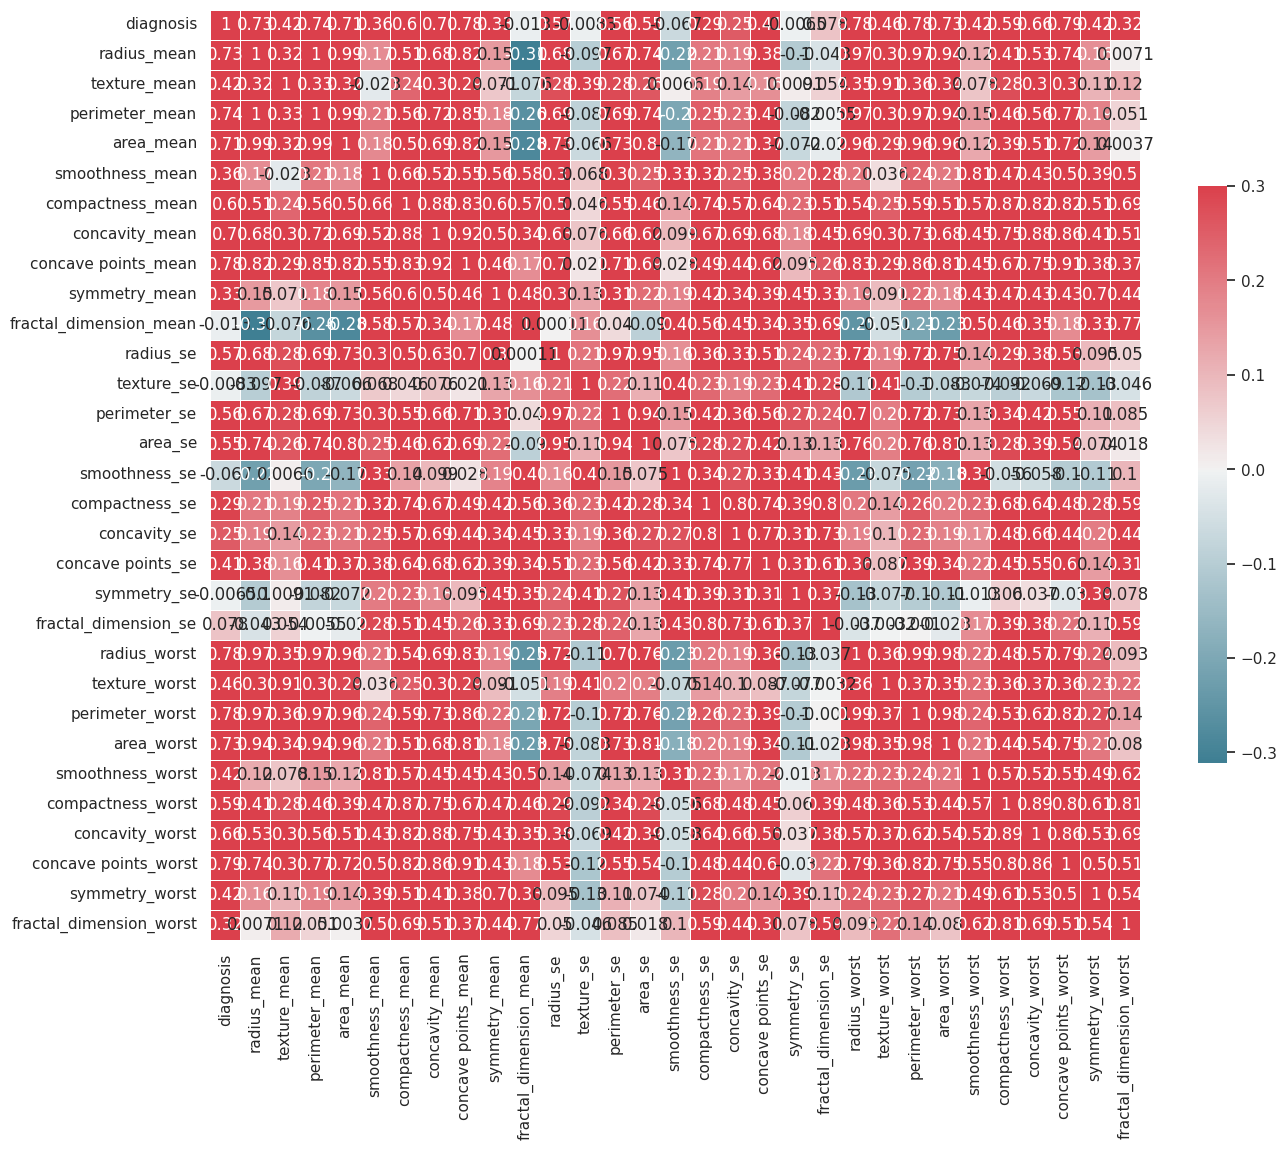

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Heatmap plot
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df.drop(['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst', 'compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst'], axis=1,inplace=True)

In [ ]:
df.columns

Index(['diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df.shape

(569, 17)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, SplineTransformer, StandardScaler
scaler = MinMaxScaler()
# scaler = Normalizer()
# scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

<Axes: ylabel='count'>

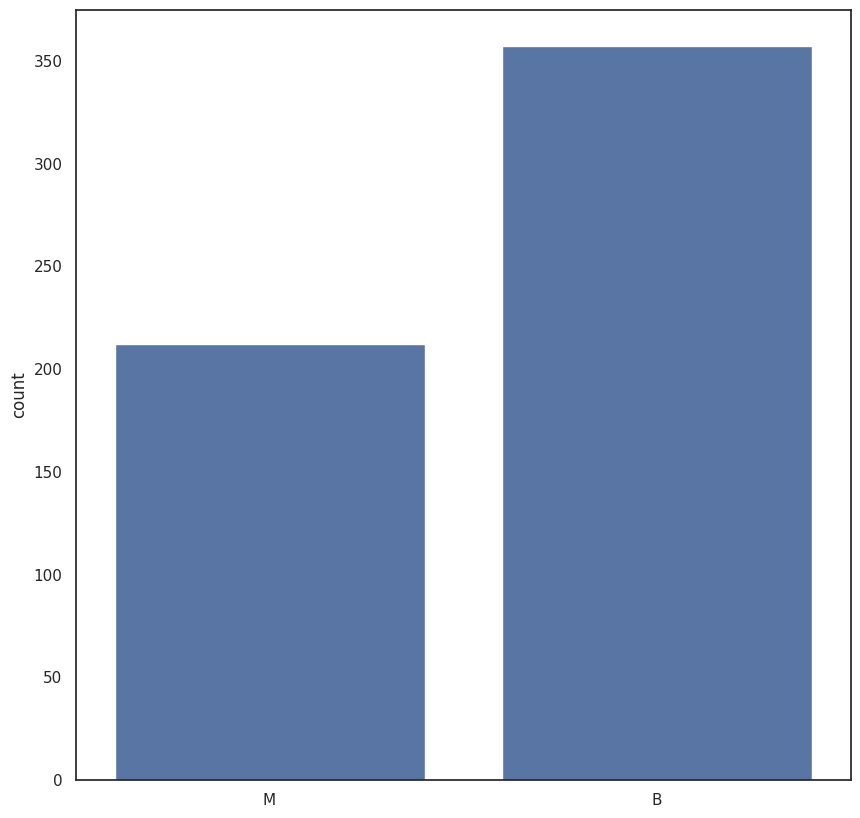

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x=y,data=df)

Class=1, n=346 (49.218%)
Class=0, n=357 (50.782%)


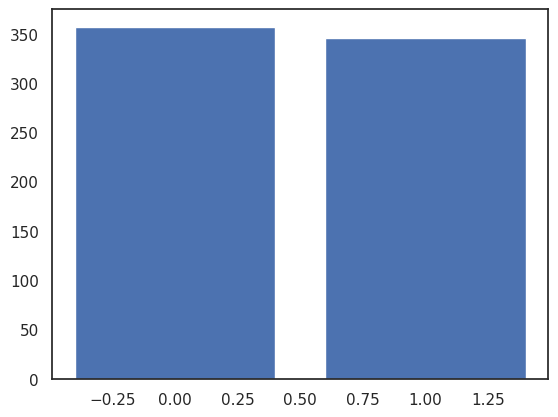

In [ ]:
from imblearn.over_sampling import SMOTE, KMeansSMOTE, RandomOverSampler, BorderlineSMOTE
from imblearn.under_sampling import TomekLinks, NearMiss
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
# oversample = BorderlineSMOTE()
# oversample = KMeansSMOTE()
# oversample = RandomOverSampler()
X, y = oversample.fit_resample(X, y)
t = TomekLinks()
X, y = t.fit_resample(X, y)
# nm = NearMiss()
# X, y = nm.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,  recall_score
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

>1, train: 0.922, test: 0.922
>2, train: 0.957, test: 0.936
>3, train: 0.972, test: 0.957
>4, train: 0.991, test: 0.936
>5, train: 0.998, test: 0.936
>6, train: 1.000, test: 0.943
>7, train: 1.000, test: 0.936
>8, train: 1.000, test: 0.957
>9, train: 1.000, test: 0.943
>10, train: 1.000, test: 0.957
>11, train: 1.000, test: 0.950
>12, train: 1.000, test: 0.950
>13, train: 1.000, test: 0.950
>14, train: 1.000, test: 0.936
>15, train: 1.000, test: 0.965
>16, train: 1.000, test: 0.929
>17, train: 1.000, test: 0.950
>18, train: 1.000, test: 0.950
>19, train: 1.000, test: 0.936
>20, train: 1.000, test: 0.943


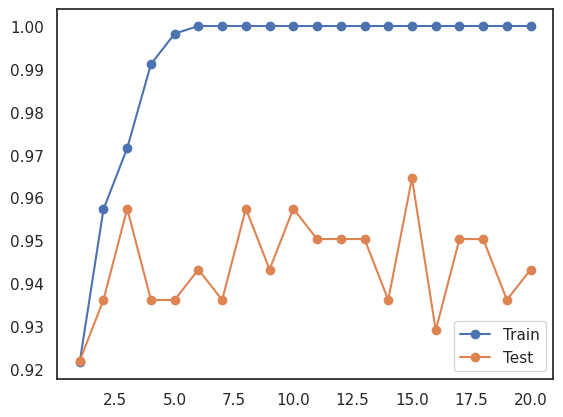

In [ ]:
# @title Decision Tree tuning depths range
from sklearn.tree import DecisionTreeClassifier

train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
  # configure the model
  model = DecisionTreeClassifier(max_depth=i)
  # fit model on the training dataset
  model.fit(X_train, y_train)
  # evaluate on the train dataset
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)
  # evaluate on the test dataset
  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)
  # summarize progress
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [ ]:
# @title Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

recall_model= recall_score(y_test, y_pred, average=None)
print(f'Recall: {recall_model}')
print(f'Avg Recall: {np.mean(recall_model)}')
scores_model = cross_val_score(dtc, X, y, cv=5)
print(f'Cross Validation Value: {scores_model}')
print(f'Avg Accuracy cv: {np.mean(scores_model)}')

print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F-Measure: {f1_score(y_test, y_pred)}')

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.9574468085106383
[[63  3]
 [ 3 72]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        66
           1       0.96      0.96      0.96        75

    accuracy                           0.96       141
   macro avg       0.96      0.96      0.96       141
weighted avg       0.96      0.96      0.96       141

Recall: [0.95454545 0.96      ]
Avg Recall: 0.9572727272727273
Cross Validation Value: [0.92198582 0.93617021 0.96453901 0.97142857 0.94285714]
Avg Accuracy cv: 0.9473961499493415
Precision: 0.96
F-Measure: 0.96


In [ ]:
# @title Decision Tree with tuning hyperparameter

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(1,21),
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

recall_model= recall_score(y_test, y_pred, average=None)
print(f'Recall: {recall_model}')
print(f'Avg Recall: {np.mean(recall_model)}')
scores_model = cross_val_score(dtc, X, y, cv=5)
print(f'Cross Validation Value: {scores_model}')
print(f'Avg Accuracy cv: {np.mean(scores_model)}')

print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F-Measure: {f1_score(y_test, y_pred)}')

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.9608723135271807
Training accuracy of Decision Tree is : 0.9928825622775801
Test accuracy of Decision Tree is : 0.9361702127659575
[[62  4]
 [ 5 70]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        66
           1       0.95      0.93      0.94        75

    accuracy                           0.94       141
   macro avg       0.94      0.94      0.94       141
weighted avg       0.94      0.94      0.94       141

Recall: [0.93939394 0.93333333]
Avg Recall: 0.9363636363636364
Cross Validation Value: [0.92198582 0.90780142 0.96453901 0.95714286 0.92857143]
Avg Accuracy cv: 0.9360081053698075
Precision: 0.9459459459459459
F-Measure: 0.9395973154362416


In [ ]:
# @title KNN
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

neigh_train_acc = accuracy_score(y_train, neigh.predict(X_train))
neigh_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {neigh_train_acc}")
print(f"Test accuracy of KNN is : {neigh_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

recall_model= recall_score(y_test, y_pred, average=None)
print(f'Recall: {recall_model}')
print(f'Avg Recall: {np.mean(recall_model)}')
scores_model = cross_val_score(neigh, X, y, cv=5)
print(f'Cross Validation Value: {scores_model}')
print(f'Avg Accuracy cv: {np.mean(scores_model)}')

print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F-Measure: {f1_score(y_test, y_pred)}')

Training accuracy of KNN is : 0.9697508896797153
Test accuracy of KNN is : 0.9574468085106383
[[64  2]
 [ 4 71]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        66
           1       0.97      0.95      0.96        75

    accuracy                           0.96       141
   macro avg       0.96      0.96      0.96       141
weighted avg       0.96      0.96      0.96       141

Recall: [0.96969697 0.94666667]
Avg Recall: 0.9581818181818182
Cross Validation Value: [0.92907801 0.92907801 0.96453901 0.95714286 0.90714286]
Avg Accuracy cv: 0.9373961499493415
Precision: 0.9726027397260274
F-Measure: 0.9594594594594594


>1, train: 1.000, test: 0.965
>2, train: 0.977, test: 0.943
>3, train: 0.970, test: 0.957
>4, train: 0.954, test: 0.950
>5, train: 0.948, test: 0.950
>6, train: 0.947, test: 0.950
>7, train: 0.947, test: 0.957
>8, train: 0.945, test: 0.950
>9, train: 0.950, test: 0.950
>10, train: 0.938, test: 0.950
>11, train: 0.943, test: 0.957
>12, train: 0.934, test: 0.950
>13, train: 0.934, test: 0.957
>14, train: 0.931, test: 0.950
>15, train: 0.932, test: 0.950
>16, train: 0.931, test: 0.950
>17, train: 0.931, test: 0.950
>18, train: 0.927, test: 0.943
>19, train: 0.932, test: 0.943
>20, train: 0.929, test: 0.943


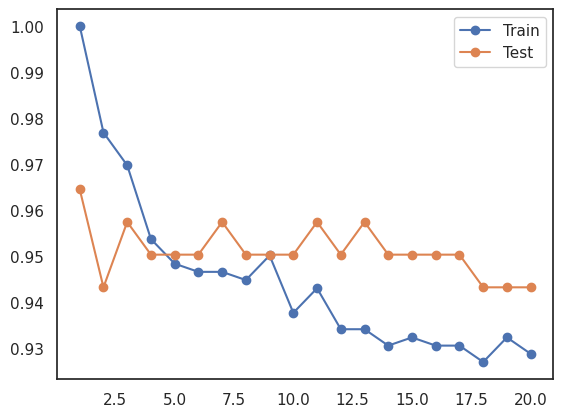

In [ ]:
# @title KNN using neighbors range
from sklearn.neighbors import KNeighborsClassifier

train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
  # configure the model
  knn = KNeighborsClassifier(n_neighbors=i)
  # fit model on the training dataset
  knn.fit(X_train, y_train)
  # evaluate on the train dataset
  train_yhat = knn.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)
  # evaluate on the test dataset
  test_yhat = knn.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)
  # summarize progress
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [ ]:
# @title KNN with tuning hyperparameter

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# dtc = DecisionTreeClassifier()
neigh = KNeighborsClassifier()

grid_params = {
    'n_neighbors' : range(1,10)
}

grid_search = GridSearchCV(neigh, grid_params, cv = 5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

neigh = grid_search.best_estimator_

y_pred = neigh.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

neigh_train_acc = accuracy_score(y_train, neigh.predict(X_train))
neigh_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {neigh_train_acc}")
print(f"Test accuracy of KNN is : {neigh_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

recall_model= recall_score(y_test, y_pred, average=None)
print(f'Recall: {recall_model}')
print(f'Avg Recall: {np.mean(recall_model)}')
scores_model = cross_val_score(neigh, X, y, cv=5)
print(f'Cross Validation Value: {scores_model}')
print(f'Avg Accuracy cv: {np.mean(scores_model)}')

print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F-Measure: {f1_score(y_test, y_pred)}')

{'n_neighbors': 1}
0.9501738305941846
Training accuracy of KNN is : 1.0
Test accuracy of KNN is : 0.9645390070921985
[[64  2]
 [ 3 72]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        66
           1       0.97      0.96      0.97        75

    accuracy                           0.96       141
   macro avg       0.96      0.96      0.96       141
weighted avg       0.96      0.96      0.96       141

Recall: [0.96969697 0.96      ]
Avg Recall: 0.9648484848484848
Cross Validation Value: [0.92198582 0.96453901 0.9858156  0.95       0.95714286]
Avg Accuracy cv: 0.9558966565349545
Precision: 0.972972972972973
F-Measure: 0.9664429530201343


In [ ]:
# @title Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

nb_train_acc = accuracy_score(y_train, nb.predict(X_train))
nb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Naive Bayes is : {nb_train_acc}")
print(f"Test accuracy of Naive Bayes is : {nb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

recall_model= recall_score(y_test, y_pred, average=None)
print(f'Recall: {recall_model}')
print(f'Avg Recall: {np.mean(recall_model)}')
scores_model = cross_val_score(nb, X, y, cv=5)
print(f'Cross Validation Value: {scores_model}')
print(f'Avg Accuracy cv: {np.mean(scores_model)}')

print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F-Measure: {f1_score(y_test, y_pred)}')

Training accuracy of Naive Bayes is : 0.9377224199288257
Test accuracy of Naive Bayes is : 0.9432624113475178
[[65  1]
 [ 7 68]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        66
           1       0.99      0.91      0.94        75

    accuracy                           0.94       141
   macro avg       0.94      0.95      0.94       141
weighted avg       0.95      0.94      0.94       141

Recall: [0.98484848 0.90666667]
Avg Recall: 0.9457575757575758
Cross Validation Value: [0.92198582 0.93617021 0.96453901 0.96428571 0.91428571]
Avg Accuracy cv: 0.9402532928064844
Precision: 0.9855072463768116
F-Measure: 0.9444444444444444


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
recall, precision = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')
print(f'Test Recall: {recall}')
print(f'Test Precision: {precision}')

# Prediksi nilai target untuk menghitung f-measure
y_pred = model.predict(X_test)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
f_measure = f1_score(y_test, y_pred_binary)
print(f'Test F-Measure: {f_measure}')


Epoch 1/100
15/15 [==============================] - 3s 27ms/step - loss: 3.2391 - accuracy: 0.7261 - val_loss: 0.9329 - val_accuracy: 0.9027
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 1.7351 - accuracy: 0.8151 - val_loss: 0.7668 - val_accuracy: 0.8673
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.6249 - accuracy: 0.8864 - val_loss: 0.6260 - val_accuracy: 0.9027
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3380 - accuracy: 0.9065 - val_loss: 0.4592 - val_accuracy: 0.9115
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2652 - accuracy: 0.9176 - val_loss: 0.2515 - val_accuracy: 0.9027
Epoch 6/100
15/15 [==============================] - 0s 10ms/step - loss: 0.2373 - accuracy: 0.9287 - val_loss: 0.8011 - val_accuracy: 0.8584
Epoch 7/100
15/15 [==============================] - 0s 24ms/step - loss: 0.6239 - accuracy: 0.8552 - val_loss: 0.3431 - val_accuracy: 0.9204
Epoch 8/10

In [ ]:
# @title SVM

from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

svm_train_acc = accuracy_score(y_train, svm_model.predict(X_train))
svm_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of SVM is : {svm_train_acc}")
print(f"Test accuracy of SVM is : {svm_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

recall_model= recall_score(y_test, y_pred, average=None)
print(f'Recall: {recall_model}')
print(f'Avg Recall: {np.mean(recall_model)}')
scores_model = cross_val_score(svm_model, X, y, cv=5)
print(f'Cross Validation Value: {scores_model}')
print(f'Avg Accuracy cv: {np.mean(scores_model)}')

print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F-Measure: {f1_score(y_test, y_pred)}')

Training accuracy of SVM is : 0.9181494661921709
Test accuracy of SVM is : 0.9219858156028369
[[63  3]
 [ 8 67]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        66
           1       0.96      0.89      0.92        75

    accuracy                           0.92       141
   macro avg       0.92      0.92      0.92       141
weighted avg       0.92      0.92      0.92       141

Recall: [0.95454545 0.89333333]
Avg Recall: 0.923939393939394
Cross Validation Value: [0.88652482 0.90780142 0.94326241 0.92857143 0.9       ]
Avg Accuracy cv: 0.9132320162107396
Precision: 0.9571428571428572
F-Measure: 0.9241379310344828


In [ ]:
# @title Ensemble model: Majority Voting

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

y_pred = voting.predict(X_test)

voting_train_acc = accuracy_score(y_train, voting.predict(X_train))
voting_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Majority Vote is : {voting_train_acc}")
print(f"Test accuracy of Majority Vote is : {voting_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

recall_model= recall_score(y_test, y_pred, average=None)
print(f'Recall: {recall_model}')
print(f'Avg Recall: {np.mean(recall_model)}')
scores_model = cross_val_score(voting, X, y, cv=5)
print(f'Cross Validation Value: {scores_model}')
print(f'Avg Accuracy cv: {np.mean(scores_model)}')

print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F-Measure: {f1_score(y_test, y_pred)}')

Training accuracy of Majority Vote is : 0.9733096085409253
Test accuracy of Majority Vote is : 0.9645390070921985
[[65  1]
 [ 4 71]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        66
           1       0.99      0.95      0.97        75

    accuracy                           0.96       141
   macro avg       0.96      0.97      0.96       141
weighted avg       0.97      0.96      0.96       141

Recall: [0.98484848 0.94666667]
Avg Recall: 0.9657575757575758
Cross Validation Value: [0.95035461 0.96453901 0.97163121 0.97142857 0.96428571]
Avg Accuracy cv: 0.9644478216818643
Precision: 0.9861111111111112
F-Measure: 0.9659863945578231


In [ ]:
# @title Ensemble model: Bagging

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(estimator=SVC())
bg.fit(X_train, y_train)

y_pred = bg.predict(X_test)

bg_train_acc = accuracy_score(y_train, bg.predict(X_train))
bg_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Bagging is : {bg_train_acc}")
print(f"Test accuracy of Bagging is : {bg_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

recall_model= recall_score(y_test, y_pred, average=None)
print(f'Recall: {recall_model}')
print(f'Avg Recall: {np.mean(recall_model)}')
scores_model = cross_val_score(bg, X, y, cv=5)
print(f'Cross Validation Value: {scores_model}')
print(f'Avg Accuracy cv: {np.mean(scores_model)}')

print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F-Measure: {f1_score(y_test, y_pred)}')

Training accuracy of Bagging is : 0.9181494661921709
Test accuracy of Bagging is : 0.9219858156028369
[[64  2]
 [ 9 66]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        66
           1       0.97      0.88      0.92        75

    accuracy                           0.92       141
   macro avg       0.92      0.92      0.92       141
weighted avg       0.93      0.92      0.92       141

Recall: [0.96969697 0.88      ]
Avg Recall: 0.9248484848484848
Cross Validation Value: [0.88652482 0.90780142 0.94326241 0.92857143 0.9       ]
Avg Accuracy cv: 0.9132320162107396
Precision: 0.9705882352941176
F-Measure: 0.9230769230769231


In [ ]:
# @title Ensemble model: AdaBoost

from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

adaboost_train_acc = accuracy_score(y_train, adaboost.predict(X_train))
adaboost_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of AdaBoost is : {adaboost_train_acc}")
print(f"Test accuracy of AdaBoost is : {adaboost_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

recall_model= recall_score(y_test, y_pred, average=None)
print(f'Recall: {recall_model}')
print(f'Avg Recall: {np.mean(recall_model)}')
scores_model = cross_val_score(adaboost, X, y, cv=5)
print(f'Cross Validation Value: {scores_model}')
print(f'Avg Accuracy cv: {np.mean(scores_model)}')

print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F-Measure: {f1_score(y_test, y_pred)}')

Training accuracy of AdaBoost is : 1.0
Test accuracy of AdaBoost is : 0.9787234042553191
[[66  0]
 [ 3 72]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        66
           1       1.00      0.96      0.98        75

    accuracy                           0.98       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.98      0.98      0.98       141

Recall: [1.   0.96]
Avg Recall: 0.98
Cross Validation Value: [0.97163121 0.96453901 0.97163121 0.97857143 0.97142857]
Avg Accuracy cv: 0.9715602836879432
Precision: 1.0
F-Measure: 0.9795918367346939


In [ ]:
# @title Ensemble model: LGBM

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

lgbm_train_acc = accuracy_score(y_train, lgbm.predict(X_train))
lgbm_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {lgbm_train_acc}")
print(f"Test accuracy of Decision Tree is : {lgbm_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

recall_model= recall_score(y_test, y_pred, average=None)
print(f'Recall: {recall_model}')
print(f'Avg Recall: {np.mean(recall_model)}')
scores_model = cross_val_score(lgbm, X, y, cv=5)
print(f'Cross Validation Value: {scores_model}')
print(f'Avg Accuracy cv: {np.mean(scores_model)}')

print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F-Measure: {f1_score(y_test, y_pred)}')

[LightGBM] [Info] Number of positive: 271, number of negative: 291
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5616
[LightGBM] [Info] Number of data points in the train set: 562, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.482206 -> initscore=-0.071204
[LightGBM] [Info] Start training from score -0.071204
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

>0, train: 0.996, test: 0.965
>0, train: 0.998, test: 0.965
>0, train: 1.000, test: 0.972
>0, train: 1.000, test: 0.979
>0, train: 1.000, test: 0.986
>0, train: 1.000, test: 0.986
>0, train: 1.000, test: 0.986
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993
>0, train: 1.000, test: 0.993


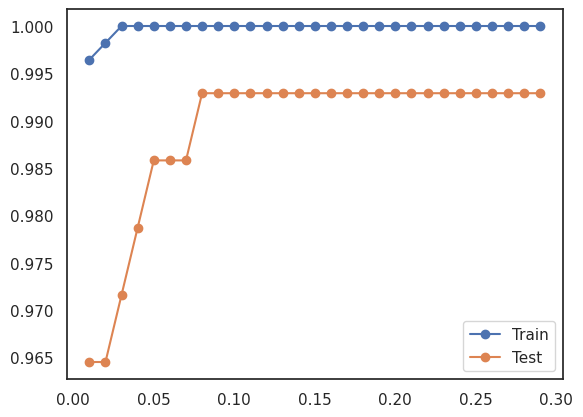

In [ ]:
# @title XGBoost using learning rate range
from xgboost import XGBClassifier

train_scores, test_scores = list(), list()
# define the learning rate to evaluate
values = [i / 100 for i in range(1, 30)]
# evaluate a decision tree for each depth
for i in values:
  # configure the model
  xgb = XGBClassifier(learning_rate=i)
  # knn = KNeighborsClassifier(n_neighbors=i)
  # fit model on the training dataset
  xgb.fit(X_train, y_train)
  # evaluate on the train dataset
  train_yhat = xgb.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)
  # evaluate on the test dataset
  test_yhat = xgb.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)
  # summarize progress
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [ ]:
# @title Ensemble model: XGBoost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score
from sklearn.feature_selection import SelectFromModel

xgb = XGBClassifier(learning_rate=0.08)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

recall_model= recall_score(y_test, y_pred, average=None)
print(f'Recall: {recall_model}')
print(f'Avg Recall: {np.mean(recall_model)}')
scores_model = cross_val_score(xgb, X, y, cv=5)
print(f'Cross Validation Value: {scores_model}')
print(f'Avg Accuracy cv: {np.mean(scores_model)}')

print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F-Measure: {f1_score(y_test, y_pred)}')

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.9929078014184397
[[66  0]
 [ 1 74]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        66
           1       1.00      0.99      0.99        75

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141

Recall: [1.         0.98666667]
Avg Recall: 0.9933333333333334
Cross Validation Value: [0.97163121 0.97163121 0.97163121 0.97857143 0.97142857]
Avg Accuracy cv: 0.9729787234042553
Precision: 1.0
F-Measure: 0.9932885906040269


In [ ]:
# @title Ensemble model: Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_train_acc = accuracy_score(y_train, rf.predict(X_train))
rf_test_acc = accuracy_score(y_test, y_pred)

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

print(f"Training accuracy of Random Forest is : {rf_train_acc}")
print(f"Test accuracy of Random Forest is : {rf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

recall_model= recall_score(y_test, y_pred, average=None)
print(f'Recall: {recall_model}')
print(f'Avg Recall: {np.mean(recall_model)}')
scores_model = cross_val_score(xgb, X, y, cv=5)
print(f'Cross Validation Value: {scores_model}')
print(f'Avg Accuracy cv: {np.mean(scores_model)}')

print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F-Measure: {f1_score(y_test, y_pred)}')

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
Training accuracy of Random Forest is : 1.0
Test accuracy of Random Forest is : 0.9787234042553191
[[65  1]
 [ 2 73]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        66
           1       0.99      0.97      0.98        75

    accuracy                           0.98       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.98      0.98      0.98       141

Recall: [0.98484848 0.97333333]
Avg Recall: 0.9790909090909091
Cross Validation Value: [0.95744681 0.9787234  0.978